In [2]:
import numpy as np
import pandas as pd
import math as m
import cmath
import sympy as sym
import scipy as sci
import matplotlib.ticker as ticker
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
from sympy import pprint
from scipy.optimize import minimize 
import MLE_functions as fn
import MLE_functions_numpy as fnn
from scipy.optimize import fsolve
import pandas as pd

# Plotting for three inputs states: 

For tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]     # 90 deg, non zero phi


For tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi


For tru = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]                # 30 deg diff, very uneven alpha

In [4]:
def ppm_errors_data(tru, nju_list):
    # Calculate the ppm errors
    ppm_errors_list = [fnn.ppm_errors(tru, nju) for nju in nju_list]
    ppm_sums_list = [[sum(i[j]) for j in range(2)] for i in ppm_errors_list]

    # Separate the ppm errors for the inversion and optimization methods
    ppm_errors_inversion = [i[0] for i in ppm_sums_list]
    ppm_errors_optimization = [i[1] for i in ppm_sums_list]

    return [ppm_errors_inversion, ppm_errors_optimization]


def plot_ppm_errors(error_sum_lists , bins =25, xlim = (None, None), ylim = (None, None)):
    # Calculate the ppm errors

    inv = error_sum_lists[0]    # list of ppm errors for inversion method
    opt = error_sum_lists[1]    # list of ppm errors for optimization method
    # Create a histogram
    plt.hist([inv, opt], bins=bins, histtype='bar', stacked=False, label=['Inversion', 'Optimization'])
    plt.xlabel('Sum of PPM Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.legend()
    plt.xlim([ xlim[0],xlim[1]]) 
    plt.show()

    # Create a box plot
    plt.boxplot([inv, opt], labels=['Inversion', 'Optimization'], 
                patch_artist=True, 
                boxprops=dict(facecolor='cyan', color='blue'), 
                medianprops=dict(color='red'), 
                whiskerprops=dict(color='green'), 
                capprops=dict(color='magenta'), 
                flierprops=dict(color='yellow', markeredgecolor='black'))
    plt.ylabel('Sum of PPM Errors')
    plt.ylim(ylim[0], ylim[1]) 
    plt.title('Box Plot of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.show()

    # Calculate the statistical properties
    average_inversion = np.mean(inv)
    average_optimization = np.mean(opt)
    std_dev_inversion = np.std(inv)
    std_dev_optimization = np.std(opt)
    avg_difference = np.sum(np.array(inv) - np.array(opt)) / len(inv)
    std_dev_difference = np.std(np.array(inv) - np.array(opt))

    print(f"Average of PPM Inversion Errors: {average_inversion}")
    print(f"Average of PPM Optimization Errors: {average_optimization}")
    print(f"Standard Deviation of PPM Errors : Inversion Method: {std_dev_inversion}")
    print(f"Standard Deviation of PPM Errors : Optimization Method: {std_dev_optimization}")
    print(f"Average Difference between Optimization and Inversion PPM Errors: {avg_difference}")
    
    # return [ppm_errors_inversion, ppm_errors_optimization]

In [17]:
# Repeat for the remaining two states
# For state 1 : tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]     # 90 deg, non zero phi
tru1 = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]
df_nju_1 = pd.read_csv('collapses_(30 120 45 90 30) 1k 1k.csv')
nju_1000_1 = df_nju_1.head(1000).values.tolist()
plot_ppm_errors(tru1, nju_1000_1[250:], bins = 50)

TypeError: plot_ppm_errors() got multiple values for argument 'bins'

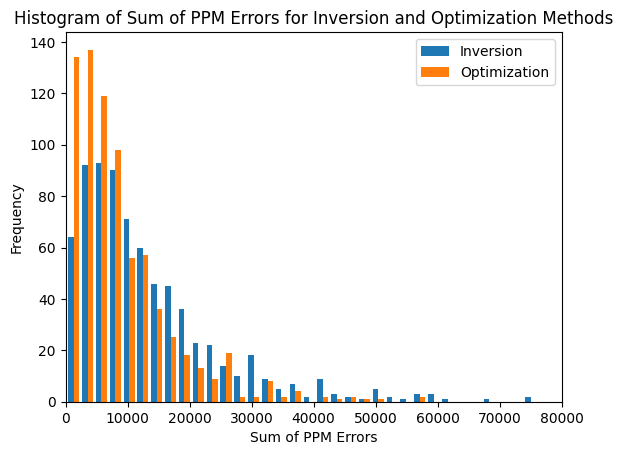

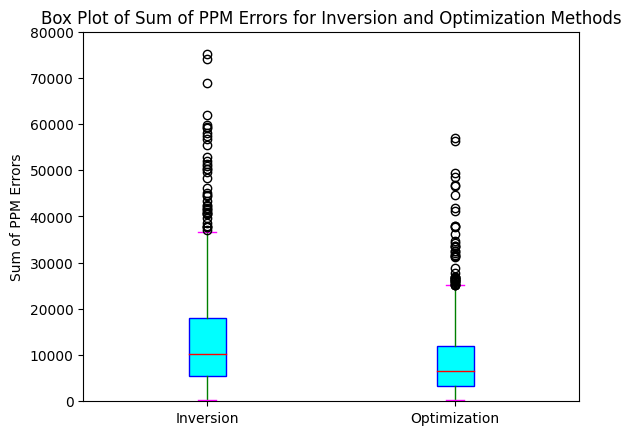

Average of PPM Inversion Errors: 15759.928657294802
Average of PPM Optimization Errors: 9283.25523726625
Standard Deviation of PPM Errors : Inversion Method: 26190.222917125437
Standard Deviation of PPM Errors : Optimization Method: 10683.840059423419
Average Difference between Optimization and Inversion PPM Errors: 6476.673420028555


In [27]:
#Now doing with changed plotting function


# For state 2 : tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi
tru2 = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]
df_nju = pd.read_csv('collapses_(15 75 45 90 60) 1k 1k.csv')
nju_1000_2 = df_nju.head(1000).values.tolist()


# error_sums_2 = ppm_errors_data(tru2, nju_1000_2[250:])
plot_ppm_errors(error_sums_2, bins = 150, xlim = (0,80000), ylim = (0,80000))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

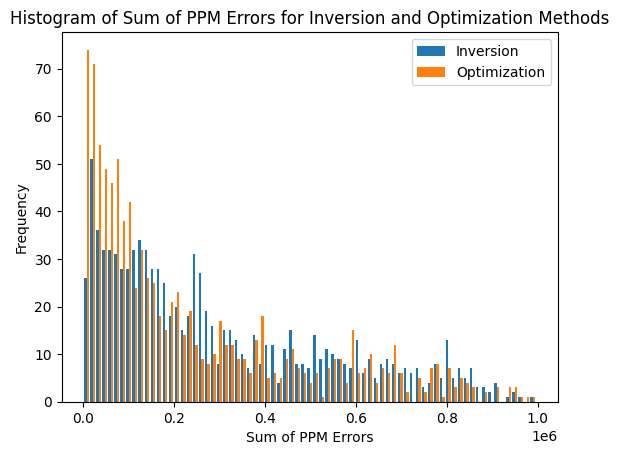

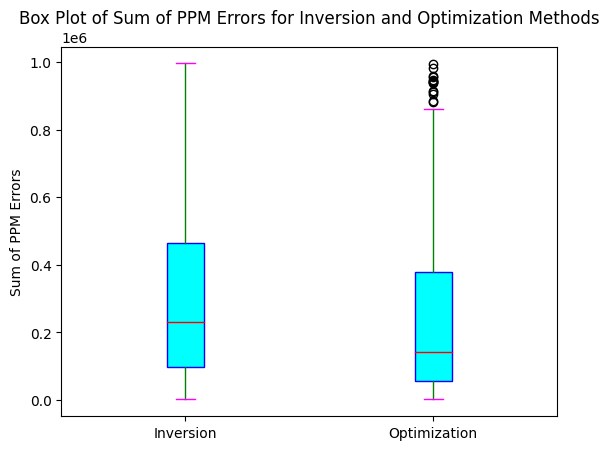

Average of PPM Inversion Errors: 298951.75425098627
Average of PPM Optimization Errors: 240564.52712321322
Standard Deviation of PPM Errors : Inversion Method: 245545.75615637164
Standard Deviation of PPM Errors : Optimization Method: 239985.82555281918
Average Difference between Optimization and Inversion PPM Errors: 58387.22712777303


In [7]:
#for martin analysis
# same for state 3 : [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]   # 30 deg diff, very small alpha
tru3 = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]
df_nju_3 = pd.read_csv('collapses_(30 60 0 45 15) 1k 1k.csv')
nju_1000_3 = df_nju_3.head(1000).values.tolist()

error_sums_3 = ppm_errors_data(tru3, nju_1000_3[250:])
plot_ppm_errors(error_sums_3, bins = 50, xlim = (0,100000), ylim = (0,100000))

In [23]:
# same for state 4 : [m.pi/2, m.pi/2+ m.pi/12, 0, m.pi/2, m.pi/12]  # 15 deg diff, very small alpha
tru4 = [m.pi/2, m.pi/2+ m.pi/12, 0, m.pi/2, m.pi/12]
# df_nju_4 = pd.read_csv('collapses_(90 105 0 90 15) 1k 1k.csv')
# nju_1000_4 = df_nju_4.head(1000).values.tolist()

# generating collapses
collapses_4 = fnn.generate_collapses(tru4, 1000, 100)
collapses_4_50k = fnn.generate_collapses(tru4, 50000, 100)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frame

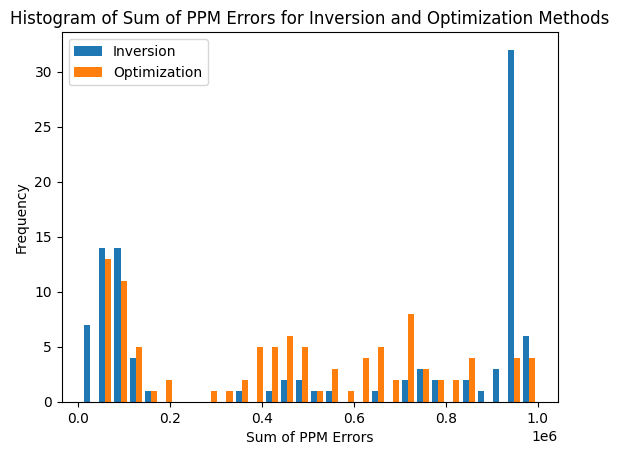

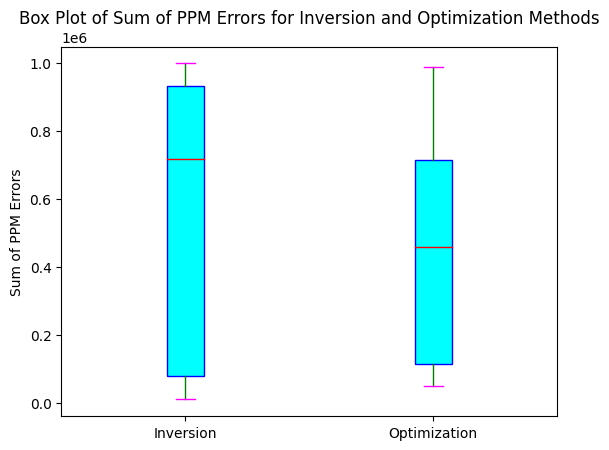

Average of PPM Inversion Errors: 537842.1646554748
Average of PPM Optimization Errors: 457722.77777764184
Standard Deviation of PPM Errors : Inversion Method: 401002.4789744329
Standard Deviation of PPM Errors : Optimization Method: 296904.6160561595
Average Difference between Optimization and Inversion PPM Errors: 80119.38687783296


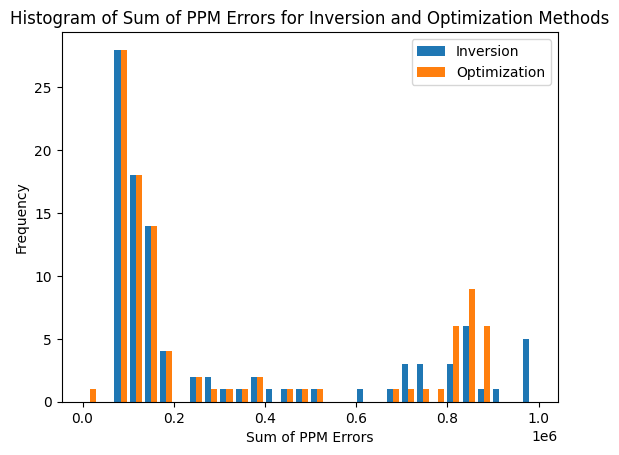

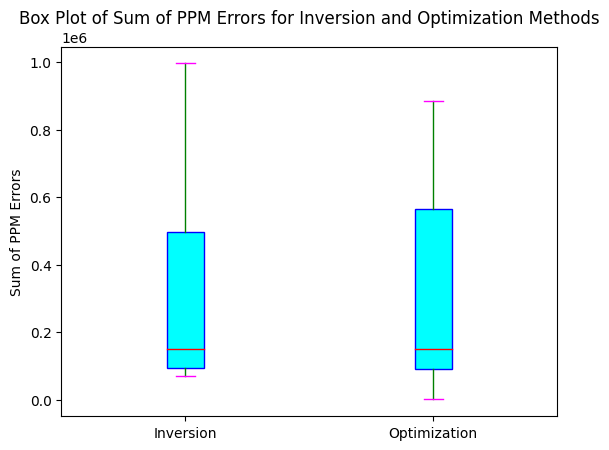

Average of PPM Inversion Errors: 314465.075696246
Average of PPM Optimization Errors: 314766.30951321166
Standard Deviation of PPM Errors : Inversion Method: 307773.78174644924
Standard Deviation of PPM Errors : Optimization Method: 308518.2286378024
Average Difference between Optimization and Inversion PPM Errors: -301.23381696567577


In [11]:
error_sums_4 = ppm_errors_data(tru4, collapses_4)
error_sums_4_50k = ppm_errors_data(tru4, collapses_4_50k)

plot_ppm_errors(error_sums_4, bins = 30)
plot_ppm_errors(error_sums_4_50k, bins = 30)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frame

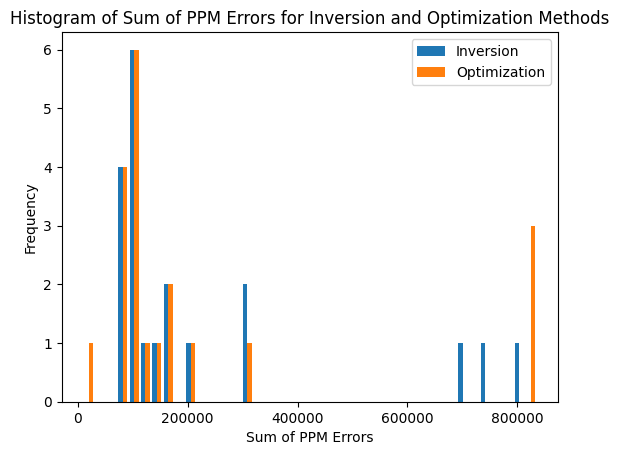

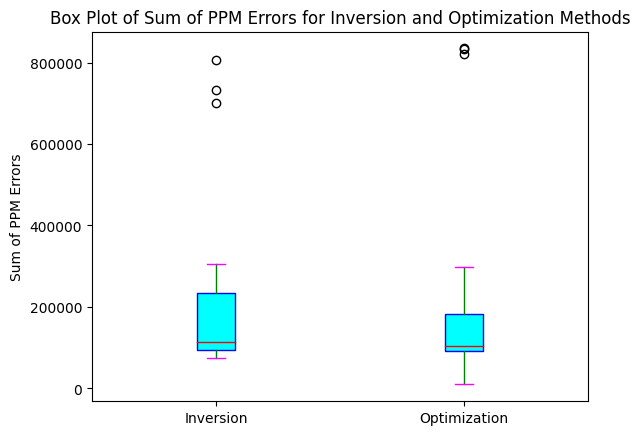

Average of PPM Inversion Errors: 228065.07699424447
Average of PPM Optimization Errors: 225808.6057896992
Standard Deviation of PPM Errors : Inversion Method: 227937.18983492898
Standard Deviation of PPM Errors : Optimization Method: 260411.84712668048
Average Difference between Optimization and Inversion PPM Errors: 2256.471204545276


In [26]:
#the 500k version for state 4
error_sums_4_100k = ppm_errors_data(tru4, collapses_4_100k[0:20])
plot_ppm_errors(error_sums_4_100k, bins = 40)

In [ ]:
# further analyzing the bad cases


In [4]:
# same for state 5 : [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]   # 30 deg diff, very small alpha
tru3 = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]
df_nju_3 = pd.read_csv('collapses_(30 60 0 45 15) 1k 1k.csv')
nju_1000_3 = df_nju_3.head(1000).values.tolist()
# plot_ppm_errors(tru3, nju_1000_3, bins = 75)

error_sums_3 = ppm_errors_data(tru3, nju_1000_3[250:])
plot_ppm_errors(error_sums_3, bins = 50, xlim = (0,100000), ylim = (0,100000))

[[1733.3991918708768, 806007.491905073],
 [981.2968499270935, 806254.0915367063]]

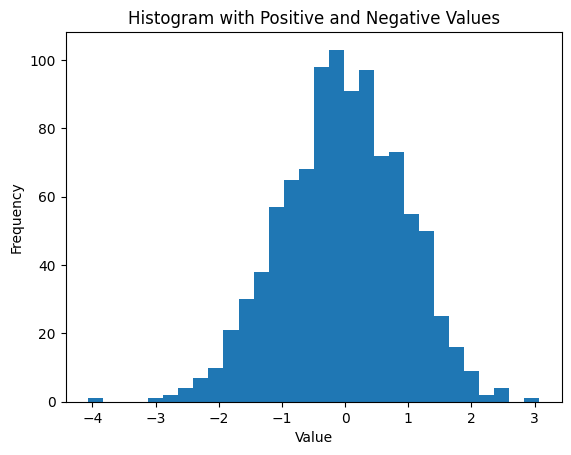

In [13]:
#rough for plottting
# Generate some data with both positive and negative values
data = np.random.normal(loc=0, scale=1, size=1000)

# Create a histogram
plt.hist(data, bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Positive and Negative Values')
plt.show()

In [13]:
# Update for state: [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12]
tru6 = [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12]     # (105,120,0,90,15)

# Generating collapses
collapses_6 = fnn.generate_collapses(tru6, 500, 500)
collapses_6_20k = fnn.generate_collapses(tru6, 20000, 100)


# Calculate the ppm errors
# error_sums_4 = ppm_errors_data(tru4, collapses_4)
# error_sums_4_50k = ppm_errors_data(tru4, collapses_4_50k)

# plot_ppm_errors(error_sums_4, bins = 30)
# plot_ppm_errors(error_sums_4_50k, bins = 30)

# for tru6
error_sums_6 = ppm_errors_data(tru6, collapses_6)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

In [14]:
error_sums_6_20k = ppm_errors_data(tru6, collapses_6_20k)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

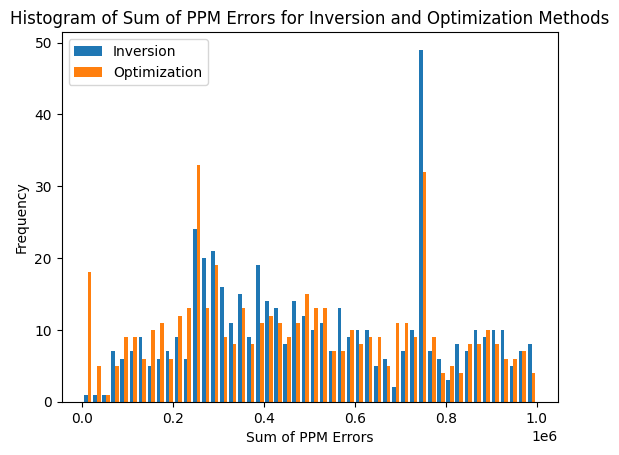

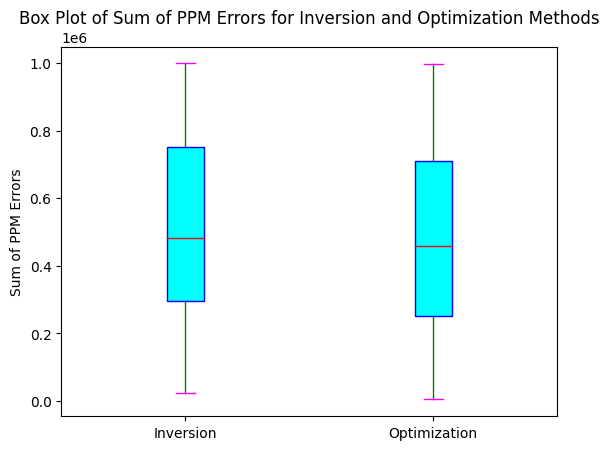

Average of PPM Inversion Errors: 513430.5052730521
Average of PPM Optimization Errors: 474151.25872657914
Standard Deviation of PPM Errors : Inversion Method: 252335.64737480495
Standard Deviation of PPM Errors : Optimization Method: 265443.6534971215
Average Difference between Optimization and Inversion PPM Errors: 39279.24654647296


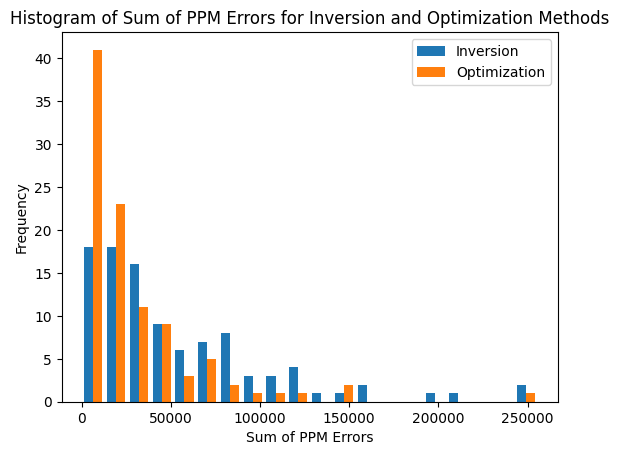

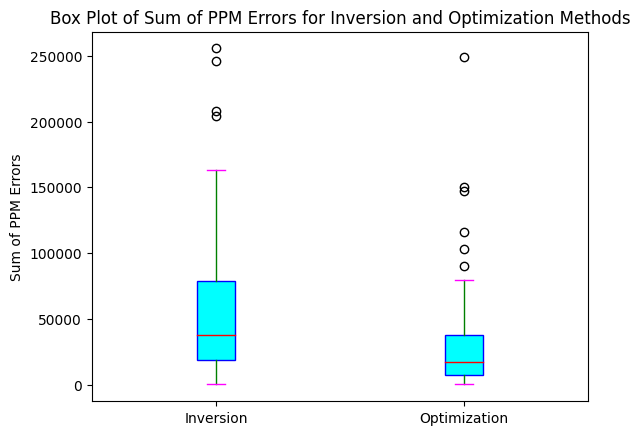

Average of PPM Inversion Errors: 54910.28776708903
Average of PPM Optimization Errors: 29763.43686233187
Standard Deviation of PPM Errors : Inversion Method: 52312.97809032504
Standard Deviation of PPM Errors : Optimization Method: 37008.539293539034
Average Difference between Optimization and Inversion PPM Errors: 25146.85090475716


In [15]:
plot_ppm_errors(error_sums_6, bins = 50)
plot_ppm_errors(error_sums_6_20k, bins = 20)

In [ ]:
fnn.ppm_errors(tru6, [1307, 144, 712, 473, 103, 756, 612, 133, 760])

prams1 = [1.33073649+0.00000000e+00j,  0.17024566+0.00000000e+00j,2.9826044 +0.00000000e+00j, -0.93498342+0.00000000e+00j,0.21936886-1.21965119e-17j]


bnj1 = [1307, 144, 712, 473, 103, 756, 612, 133, 760]
bnj2 = [1444, 148, 617, 519, 95, 777, 600, 123, 677]
bnj3 = [1342, 169, 667, 490, 99, 750, 594, 103, 786]
less1= [1366, 148, 654, 511, 89, 760, 619, 126, 727]

# fun = fnn.L(vars = prams1, n = bnj1)
# fun

L_tru6 = fnn.L(vars = tru6, n = bnj1)
print(L_tru6)

# MARTIN CASE
# opt.AuxParams={{0.2614,0.0288,0.1424,0.0946,0.0206,0.1512,0.1224,0.0266,0.152}}
# case6(MIT): {theta1,theta2,phi1,phi2,alpha}={{1.33073649,0.17024566,-2.9826044,-0.93498342,0.21936886}}
#  ---> NYFunction = 1.959768143157167
bnjn1 = [i/sum(bnj1) for i in bnj1]
prob_params = fnn.pr_num([1.33073649,0.17024566,-2.9826044,-0.93498342,0.21936886])
prob_params = [0.25526472341208967, 0.02896871461128489, 0.1333327431548282, 0.0969470432734706, 0.020183709309324616, 0.15304763238431282, 0.1239280379744138, 0.026836900566235833, 0.16149049531404092]
log_prob_params = [m.log(i) for i in prob_params]
L_list = [m.log(i)*j for i,j in zip(prob_params, bnjn1)]
L = sum(L_list)
L

# fucntion output
Lf = fnn.L(vars = [1.33073649,0.17024566,-2.9826044,-0.93498342,0.21936886], n = bnj1)
Lf

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


1.9609287555690416


1.9597681431571656

In [19]:
# writing the data to csv for tru6
collapses_6
df = pd.DataFrame(collapses_6)
df.to_csv('collapses_(105 120 0 90 15) 500 500.csv', index=False)

#same for  collapses_6_20k
df = pd.DataFrame(collapses_6_20k)
df.to_csv('collapses_(105 120 0 90 15) 20k 100.csv', index=False)
